# <left> Data Manipulation


In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

sb.set()

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Cleaned.csv")
target = 'Weekly_Sales'

In [3]:
# Splitting the data into training & testing sets

df.columns = df.columns.str.replace(' ', '_')
X = df.drop(target, axis=1)
Y = df[target]

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
train_X.reset_index(drop=True, inplace=True)

print(f'Original set: X={X.shape}, Y={Y.shape}')
print(f'Training set: X={train_X.shape}, Y={train_Y.shape}')
print(f'Testing set: X={test_X.shape}, Y={test_Y.shape}')

Original set: X=(5953, 70), Y=(5953,)
Training set: X=(4762, 70), Y=(4762,)
Testing set: X=(1191, 70), Y=(1191,)


In [4]:
# Splitting the data into training & testing sets

df.columns = df.columns.str.replace(' ', '_')
X = df.drop(target, axis=1)
Y = df[target]

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
train_X.reset_index(drop=True, inplace=True)

print(f'Original set: X={X.shape}, Y={Y.shape}')
print(f'Training set: X={train_X.shape}, Y={train_Y.shape}')
print(f'Testing set: X={test_X.shape}, Y={test_Y.shape}')

Original set: X=(5953, 70), Y=(5953,)
Training set: X=(4762, 70), Y=(4762,)
Testing set: X=(1191, 70), Y=(1191,)


In [5]:
# Feature Scaling (Standardization)

scaler = StandardScaler()

print('Standardization on Training set'.center(80, '-'))
train_X_std = pd.DataFrame(scaler.fit_transform(train_X), columns=train_X.columns)
display(train_X_std.describe())

print('Standardization on Testing set'.center(80, '-'))
test_X_std = pd.DataFrame(scaler.transform(test_X), columns=test_X.columns)
display(test_X_std.describe())

------------------------Standardization on Training set-------------------------


,Unnamed:_0.1,Unnamed:_0,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year_2011,year_2012,day_1,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
count,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03,...,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03
mean,-8.570306e-17,4.597564e-17,-1.741339e-16,-1.494674e-16,-3.367039e-16,-2.799804e-16,-4.039888e-16,3.964583e-16,3.839385e-16,-3.934507e-16,...,-4.515031e-16,-6.241216e-16,-1.086772e-15,-6.947287e-16,-2.611192e-17,3.944649e-16,-1.004738e-15,5.259687e-16,6.589880e-16,6.687683e-17
std,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,...,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00
min,-1.748781e+00,-1.715773e+00,-2.742012e-01,-2.961575e+00,-1.871814e+00,-1.248731e+00,-2.762670e+00,-7.526270e-01,-6.371530e-01,-2.588345e-01,...,-1.573123e-01,-1.587085e-01,-4.351484e-02,-1.580118e-01,-1.307162e-01,-1.537717e-01,-1.573123e-01,-1.628322e-01,-1.551967e-01,-1.523346e-01
25%,-8.604846e-01,-8.904964e-01,-2.742012e-01,-7.314248e-01,-9.886990e-01,-1.076949e+00,-6.783836e-01,-7.526270e-01,-6.371530e-01,-2.588345e-01,...,-1.573123e-01,-1.587085e-01,-4.351484e-02,-1.580118e-01,-1.307162e-01,-1.537717e-01,-1.573123e-01,-1.628322e-01,-1.551967e-01,-1.523346e-01
50%,1.201427e-02,-2.170604e-02,-2.742012e-01,1.062547e-01,1.663112e-01,3.842133e-01,9.596435e-02,-7.526270e-01,-6.371530e-01,-2.588345e-01,...,-1.573123e-01,-1.587085e-01,-4.351484e-02,-1.580118e-01,-1.307162e-01,-1.537717e-01,-1.573123e-01,-1.628322e-01,-1.551967e-01,-1.523346e-01
75%,8.570144e-01,8.449355e-01,-2.742012e-01,7.731979e-01,8.427860e-01,9.933828e-01,6.138095e-01,1.328679e+00,1.569482e+00,-2.588345e-01,...,-1.573123e-01,-1.587085e-01,-4.351484e-02,-1.580118e-01,-1.307162e-01,-1.537717e-01,-1.573123e-01,-1.628322e-01,-1.551967e-01,-1.523346e-01
max,1.733609e+00,1.740586e+00,3.646958e+00,2.170008e+00,2.469806e+00,1.340791e+00,2.575491e+00,1.328679e+00,1.569482e+00,3.863473e+00,...,6.356783e+00,6.300861e+00,2.298067e+01,6.328643e+00,7.650163e+00,6.503146e+00,6.356783e+00,6.141290e+00,6.443435e+00,6.564495e+00


-------------------------Standardization on Testing set-------------------------


,Unnamed:_0.1,Unnamed:_0,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year_2011,year_2012,day_1,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
count,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,...,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000
mean,-0.037917,-0.037382,0.005646,0.044406,0.075113,0.021041,-0.050953,0.052984,0.065042,0.007679,...,-0.004168,-0.017693,0.111140,-0.010959,-0.000055,0.030677,-0.004168,-0.056970,0.016556,0.045053
std,1.026814,1.026884,1.009885,1.000220,0.971917,1.004644,1.010206,1.014188,1.028250,1.014142,...,0.987401,0.944330,1.881448,0.965939,1.000214,1.093088,0.987401,0.810380,1.051077,1.134875
min,-1.742930,-1.710401,-0.274201,-2.857425,-1.780457,-1.248731,-2.762670,-0.752627,-0.637153,-0.258834,...,-0.157312,-0.158708,-0.043515,-0.158012,-0.130716,-0.153772,-0.157312,-0.162832,-0.155197,-0.152335
25%,-0.954243,-0.976583,-0.274201,-0.657516,-0.852751,-1.077025,-0.699355,-0.752627,-0.637153,-0.258834,...,-0.157312,-0.158708,-0.043515,-0.158012,-0.130716,-0.153772,-0.157312,-0.162832,-0.155197,-0.152335
50%,-0.094763,-0.119745,-0.274201,0.187351,0.298996,0.393492,0.058860,-0.752627,-0.637153,-0.258834,...,-0.157312,-0.158708,-0.043515,-0.158012,-0.130716,-0.153772,-0.157312,-0.162832,-0.155197,-0.152335
75%,0.875883,0.862260,-0.274201,0.818764,0.844961,1.019967,0.611390,1.328679,1.569482,-0.258834,...,-0.157312,-0.158708,-0.043515,-0.158012,-0.130716,-0.153772,-0.157312,-0.162832,-0.155197,-0.152335
max,1.732439,1.739511,3.646958,2.035481,2.469806,1.345814,2.575491,1.328679,1.569482,3.863473,...,6.356783,6.300861,22.980668,6.328643,7.650163,6.503146,6.356783,6.141290,6.443435,6.564495


# <left> Predictive Modelling

In [6]:
Model_Compare = pd.DataFrame(np.zeros([4,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS','Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])

rc=np.random.choice(train_X_std.loc[:,train_X_std.nunique()>=50].columns.values,2,replace=False)
def Evaluate(n, train_pred, test_pred):
    #Plotting predicted predicteds alongside the actual datapoints 
    plt.figure(figsize=[15,6])
    for e,i in enumerate(rc):
        plt.subplot(2,3,e+1)
        plt.scatter(y=train_Y, x=train_X_std[i], label='Actual')
        plt.scatter(y=train_pred, x=train_X_std[i], label='Prediction')
        plt.legend()
    plt.show()

    #Evaluating the Multiple Linear Regression Model

    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->',round(r2_score(train_Y, train_pred),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(train_Y-train_pred)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(train_Y, train_pred),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(train_Y, train_pred)),20))

    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->',round(r2_score(test_Y, test_pred),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(test_Y-test_pred)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(test_Y, test_pred),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(test_Y, test_pred)),20))
    print('\n{}Residual Plots{}'.format('-'*20, '-'*20))

    Model_Compare.loc[n,'Train-R2']  = round(r2_score(train_Y, train_pred),20)
    Model_Compare.loc[n,'Train-RSS'] = round(np.sum(np.square(train_Y-train_pred)),20)
    Model_Compare.loc[n,'Train-MSE'] = round(mean_squared_error(train_Y, train_pred),20)
    Model_Compare.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(train_Y, train_pred)),20)

    Model_Compare.loc[n,'Test-R2']   = round(r2_score(test_Y, test_pred),20)
    Model_Compare.loc[n,'Test-RSS']  = round(np.sum(np.square(test_Y-test_pred)),20)
    Model_Compare.loc[n,'Test-MSE']  = round(mean_squared_error(test_Y, test_pred),20)
    Model_Compare.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(test_Y, test_pred)),20)

    plt.figure(figsize=[15,4])
    plt.subplot(1,2,1)
    sb.distplot((train_Y - train_pred))
    plt.title('Error Terms')          
    plt.xlabel('Errors') 

    plt.subplot(1,2,2)
    plt.scatter(train_Y,train_pred)
    plt.plot([train_Y.min(),train_Y.max()],[train_Y.min(),train_Y.max()], 'r--')
    plt.title('Test vs Prediction')         
    plt.xlabel('y_test')                       
    plt.ylabel('y_pred')                       
    plt.show()

## a. Lasso Linear Regression

<<<----------------------------------- Evaluating Lasso Regression Model ----------------------------------->>>

The Intercept of the Regresion Model was found to be  1047603.2981121379


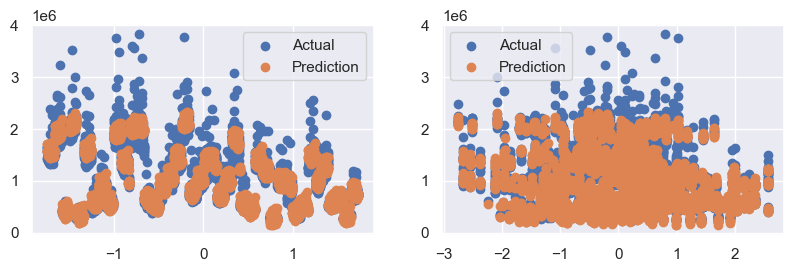



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9326662017306254
Residual Sum of Squares (RSS) on Training set  ---> 103770553758662.84
Mean Squared Error (MSE) on Training set       ---> 21791380461.709965
Root Mean Squared Error (RMSE) on Training set ---> 147619.03827660566

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9303768168201095
Residual Sum of Squares (RSS) on Training set  ---> 28363042096055.94
Mean Squared Error (MSE) on Training set       ---> 23814476990.81104
Root Mean Squared Error (RMSE) on Training set ---> 154319.39926921384

--------------------Residual Plots--------------------


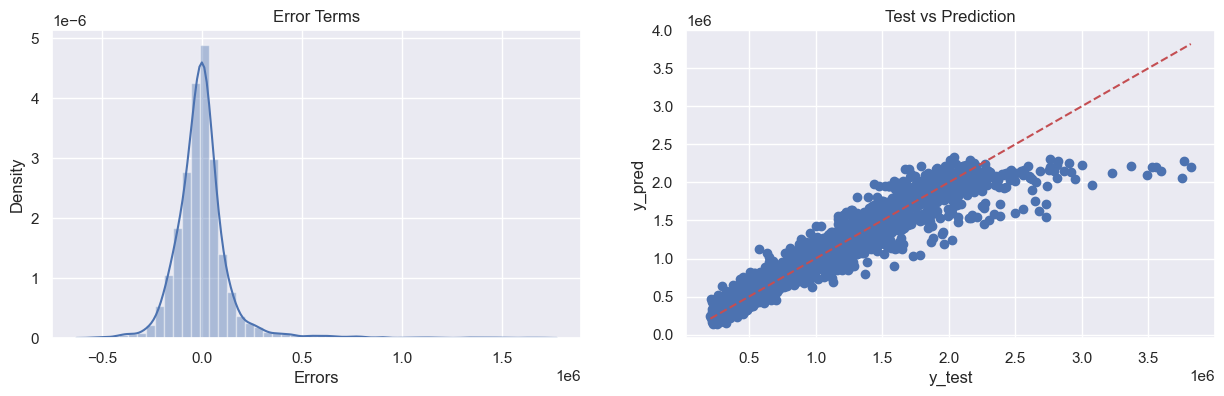

In [7]:
from sklearn.linear_model import Lasso

LLR = Lasso().fit(train_X_std,train_Y)
train_pred = LLR.predict(train_X_std)
test_pred = LLR.predict(test_X_std)

print('{}{}\033[1m Evaluating Lasso Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Intercept of the Regresion Model was found to be ',LLR.intercept_)
Evaluate(0, train_pred, test_pred)

## b. Ridge Linear Regression

<<<----------------------------------- Evaluating Ridge Regression Model ----------------------------------->>>

The Intercept of the Regresion Model was found to be  1047603.298112138


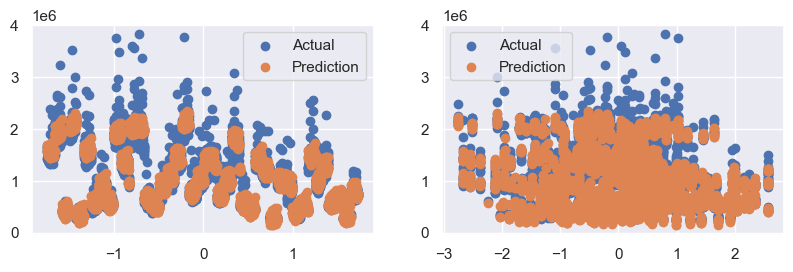



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9328270953307852
Residual Sum of Squares (RSS) on Training set  ---> 103522594807676.3
Mean Squared Error (MSE) on Training set       ---> 21739310123.409554
Root Mean Squared Error (RMSE) on Training set ---> 147442.56550741903

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9304652072921058
Residual Sum of Squares (RSS) on Training set  ---> 28327033649391.734
Mean Squared Error (MSE) on Training set       ---> 23784243198.481724
Root Mean Squared Error (RMSE) on Training set ---> 154221.40966312596

--------------------Residual Plots--------------------


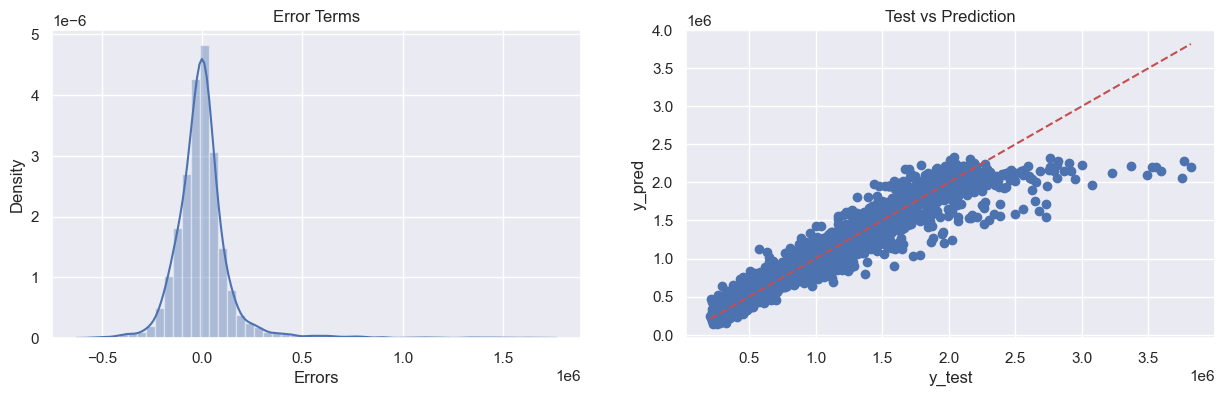

In [8]:
from sklearn.linear_model import Ridge

#Creating a Ridge Regression model

Ridge_Linear_Regress = Ridge().fit(train_X_std,train_Y)
pred1 = Ridge_Linear_Regress.predict(train_X_std)
pred2 = Ridge_Linear_Regress.predict(test_X_std)

print('{}{}\033[1m Evaluating Ridge Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Intercept of the Regresion Model was found to be ',Ridge_Linear_Regress.intercept_)

Evaluate(1, pred1, pred2)

## c. Elastic Net Regression

<<<----------------------------------- Evaluating Elastic-Net Regression Model ----------------------------------->>>

The Intercept of the Regresion Model was found to be  1047603.2981121379


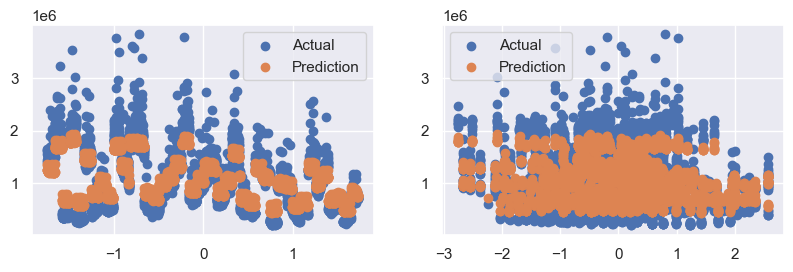



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.8335758758432081
Residual Sum of Squares (RSS) on Training set  ---> 256482241703652.7
Mean Squared Error (MSE) on Training set       ---> 53860193553.89599
Root Mean Squared Error (RMSE) on Training set ---> 232077.99024012595

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.8331382895369457
Residual Sum of Squares (RSS) on Training set  ---> 67976003134692.47
Mean Squared Error (MSE) on Training set       ---> 57074729752.05078
Root Mean Squared Error (RMSE) on Training set ---> 238903.1807072706

--------------------Residual Plots--------------------


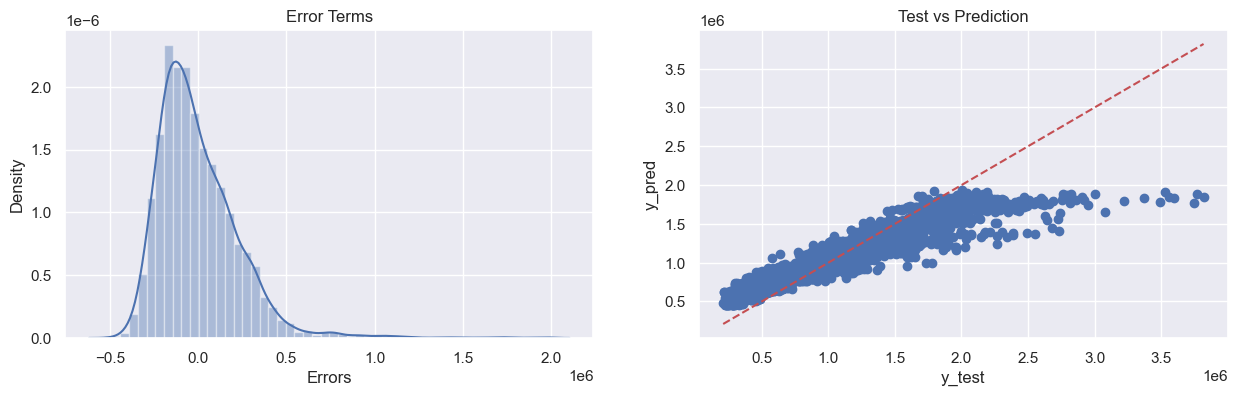

In [9]:
from sklearn.linear_model import ElasticNet

#Creating a ElasticNet Regression model

Elastic_Net_Regress = ElasticNet().fit(train_X_std,train_Y)
pred1 = Elastic_Net_Regress.predict(train_X_std)
pred2 = Elastic_Net_Regress.predict(test_X_std)

print('{}{}\033[1m Evaluating Elastic-Net Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Intercept of the Regresion Model was found to be ',Elastic_Net_Regress.intercept_)

Evaluate(2, pred1, pred2)

## d. Polynomial Regression

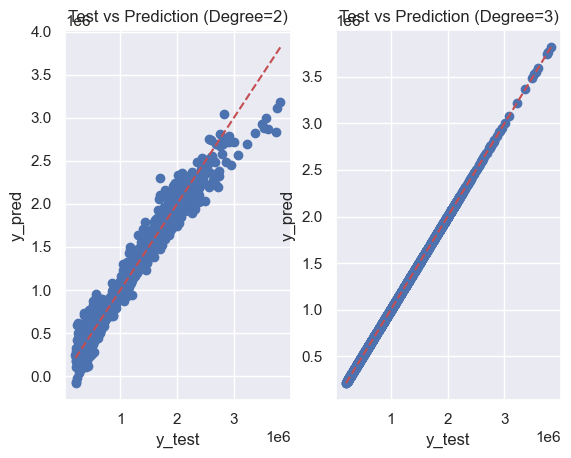

In [10]:
#see which degree is able to fit the datapoints the best 
from sklearn.preprocessing import PolynomialFeatures

#degree 2 graph
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(train_X_std)
X_poly1 = poly_reg.fit_transform(test_X_std)
PR = LinearRegression()
PR.fit(X_poly, train_Y)

pred1 = PR.predict(X_poly)
pred2 = PR.predict(X_poly1)

#plt.figure(figsize=[15,4])
plt.subplot(1,2,1)
plt.scatter(train_Y,pred1)
plt.plot([train_Y.min(),train_Y.max()],[train_Y.min(),train_Y.max()], 'r--')
plt.title('Test vs Prediction (Degree=2)')         
plt.xlabel('y_test')                       
plt.ylabel('y_pred')                       

#degree 3 graph
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(train_X_std)
X_poly1 = poly_reg.fit_transform(test_X_std)
PR = LinearRegression()
PR.fit(X_poly, train_Y)

pred1 = PR.predict(X_poly)
pred2 = PR.predict(X_poly1)

#plt.figure(figsize=[15,4])
plt.subplot(1,2,2)
plt.scatter(train_Y,pred1)
plt.plot([train_Y.min(),train_Y.max()],[train_Y.min(),train_Y.max()], 'r--')
plt.title('Test vs Prediction (Degree=3)')         
plt.xlabel('y_test')                       
plt.ylabel('y_pred')  

plt.show()

```

We will choose 2nd order polynomial regression as it is more suitable for the datapoints. 3rd order polynomial would result in overfitting.

<<<----------------------------------- Evaluating Polynomial Regression Model ----------------------------------->>>



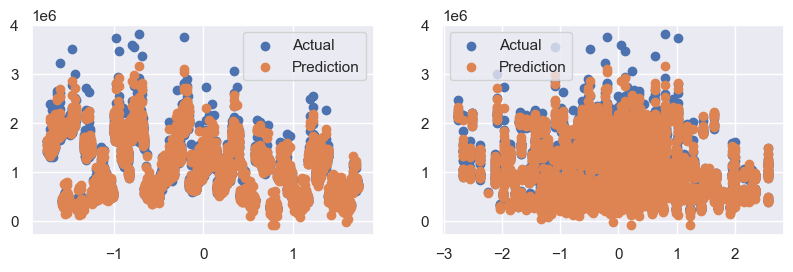



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9817212395083574
Residual Sum of Squares (RSS) on Training set  ---> 28170059420254.54
Mean Squared Error (MSE) on Training set       ---> 5915594166.370126
Root Mean Squared Error (RMSE) on Training set ---> 76912.89986972358

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> -4.762482113042802e+16
Residual Sum of Squares (RSS) on Training set  ---> 1.940136524710946e+31
Mean Squared Error (MSE) on Training set       ---> 1.6289979216716592e+28
Root Mean Squared Error (RMSE) on Training set ---> 127632202898471.45

--------------------Residual Plots--------------------


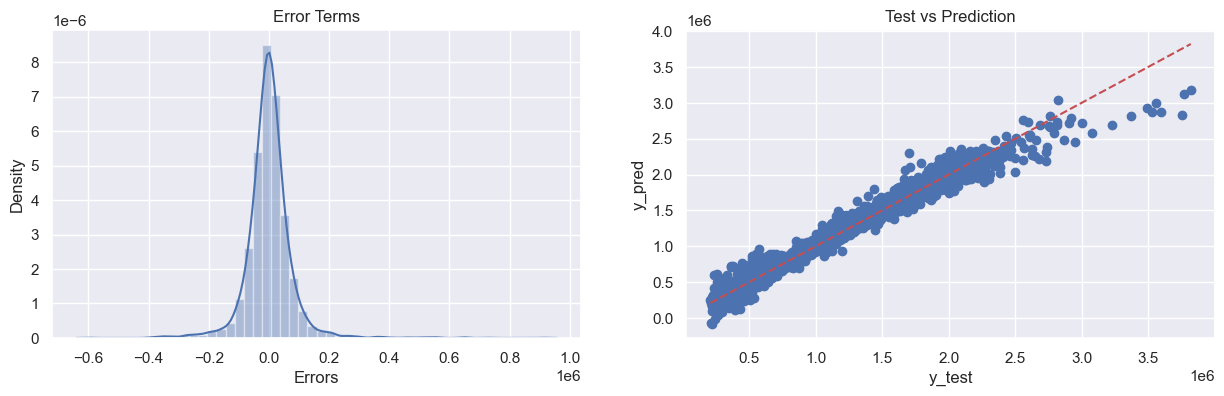

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(train_X_std)
X_poly1 = poly_reg.fit_transform(test_X_std)
PR = LinearRegression()
PR.fit(X_poly, train_Y)

pred1 = PR.predict(X_poly)
pred2 = PR.predict(X_poly1)

print('{}{}\033[1m Evaluating Polynomial Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))

Evaluate(3, pred1, pred2)

# <left> Comparing the Regression Models

In [12]:
MC = Model_Compare.copy()
MC.index = ['Lasso Linear Regression (LLR)','Ridge Linear Regression (RLR)','Elastic-Net Regression (ENR)','Polynomial Regression (PNR)']
MC

,Train-R2,Test-R2,Train-RSS,Test-RSS,Train-MSE,Test-MSE,Train-RMSE,Test-RMSE
Lasso Linear Regression (LLR),0.932666,9.303768e-01,1.037706e+14,2.836304e+13,2.179138e+10,2.381448e+10,147619.038277,1.543194e+05
Ridge Linear Regression (RLR),0.932827,9.304652e-01,1.035226e+14,2.832703e+13,2.173931e+10,2.378424e+10,147442.565507,1.542214e+05
Elastic-Net Regression (ENR),0.833576,8.331383e-01,2.564822e+14,6.797600e+13,5.386019e+10,5.707473e+10,232077.990240,2.389032e+05
Polynomial Regression (PNR),0.981721,-4.762482e+16,2.817006e+13,1.940137e+31,5.915594e+09,1.628998e+28,76912.899870,1.276322e+14
